In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving benin-malanville.csv to benin-malanville.csv


In [3]:
 benin = pd.read_csv('benin-malanville.csv')

In [ ]:
print(benin.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [ ]:
print(benin.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [ ]:
print(benin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
print("Shape of the dataset:", benin.shape)

Shape of the dataset: (525600, 19)


In [ ]:
print(benin.dtypes)

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [ ]:
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])

In [ ]:
print(benin.dtypes)

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object


#Data Cleaning

In [ ]:
print(benin.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Drop 'comments' column because it lacks data and is not necessary for analysis

In [ ]:
benin.drop(columns=['Comments'], inplace=True)

In [ ]:
print(benin.isnull().sum())

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [ ]:
null_percentage = benin.isnull().mean() * 100  # percentage of nulls for each column
columns_with_nulls = null_percentage[null_percentage > 5]  # Filter columns with more than 5% nulls
print(columns_with_nulls)

Series([], dtype: float64)


In [ ]:
duplicates = benin.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
print("Shape of the dataset:", benin.shape)

Shape of the dataset: (525600, 18)


#Summary Statistics

In [ ]:
benin.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


#Outlier Detection

In [ ]:
from scipy import stats
#Outlier Detection using Z-scores
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(benin[key_columns]))


In [ ]:
# Flagging rows with outliers
benin['outlier'] = (z_scores > 3).any(axis=1)

In [ ]:
print(benin)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1 

Outlier rows

In [ ]:
outlier_rows = benin[benin['outlier']]
print(outlier_rows)

                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
525141 2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142 2022-08-08 16:23:00     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143 2022-08-08 16:24:00     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151 2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155 2022-08-08 16:36:00     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WD

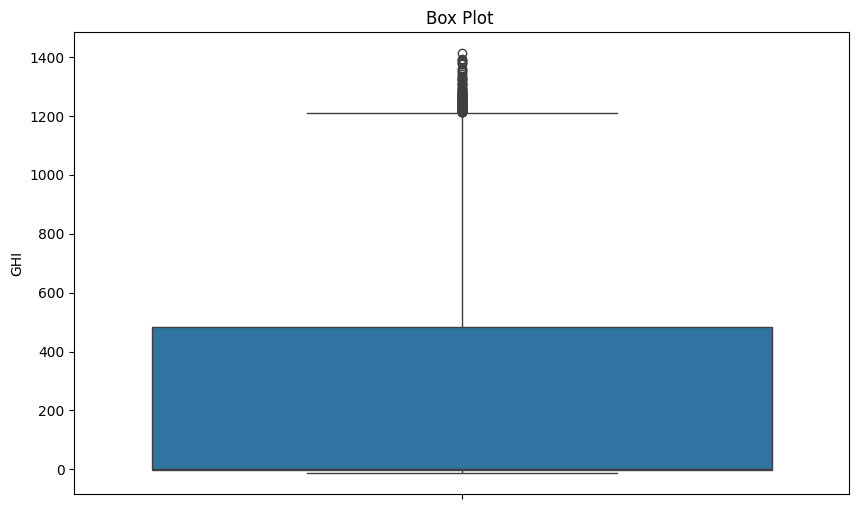

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=benin['GHI'])
plt.title('Box Plot ')
plt.show()

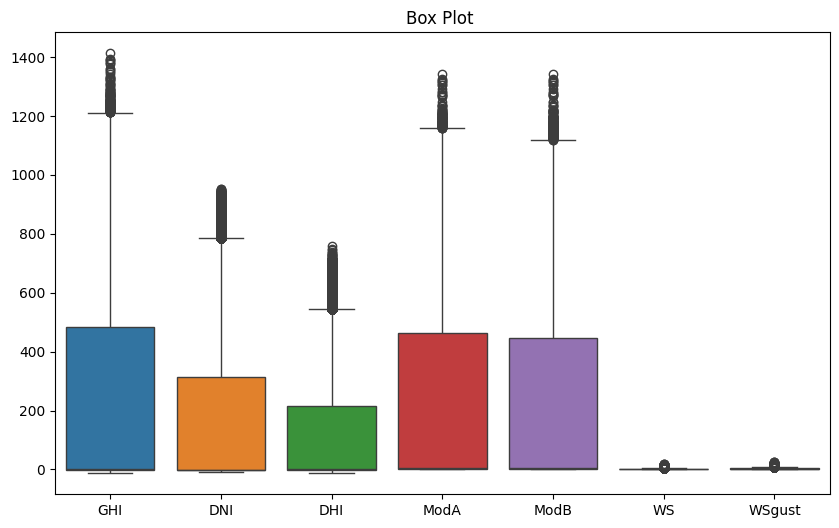

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=benin[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS','WSgust']])
plt.title('Box Plot ')
plt.show()

In [ ]:
print("Summary Statistics with Outliers:")
print(benin.describe())

# Filter outliers
df_no_outliers = benin[~benin['outlier']]
print("Summary Statistics without Outliers:")
print(df_no_outliers.describe())

Summary Statistics with Outliers:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.

Handling outliers using Z-score

In [ ]:
from scipy import stats

# columns to analyze
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(benin[key_columns]))

# Flagging rows with outliers
threshold = 3  # threshold for identifying outliers
benin['outlier'] = np.any(z_scores > threshold, axis=1)  # True if any Z-score > 3
print(benin[benin['outlier']])  


               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

In [9]:
# Saving the cleaned DataFrame to a new CSV file
benin.to_csv('cleaned_benin_data.csv', index=False)

In [10]:
import pandas as pd
df_cleaned = pd.read_csv('cleaned_benin_data.csv')

In [11]:
from google.colab import files
files.download('cleaned_benin_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Time Series Analysis

<ipython-input-12-12a9b84c28d1>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = benin.resample('H').mean()


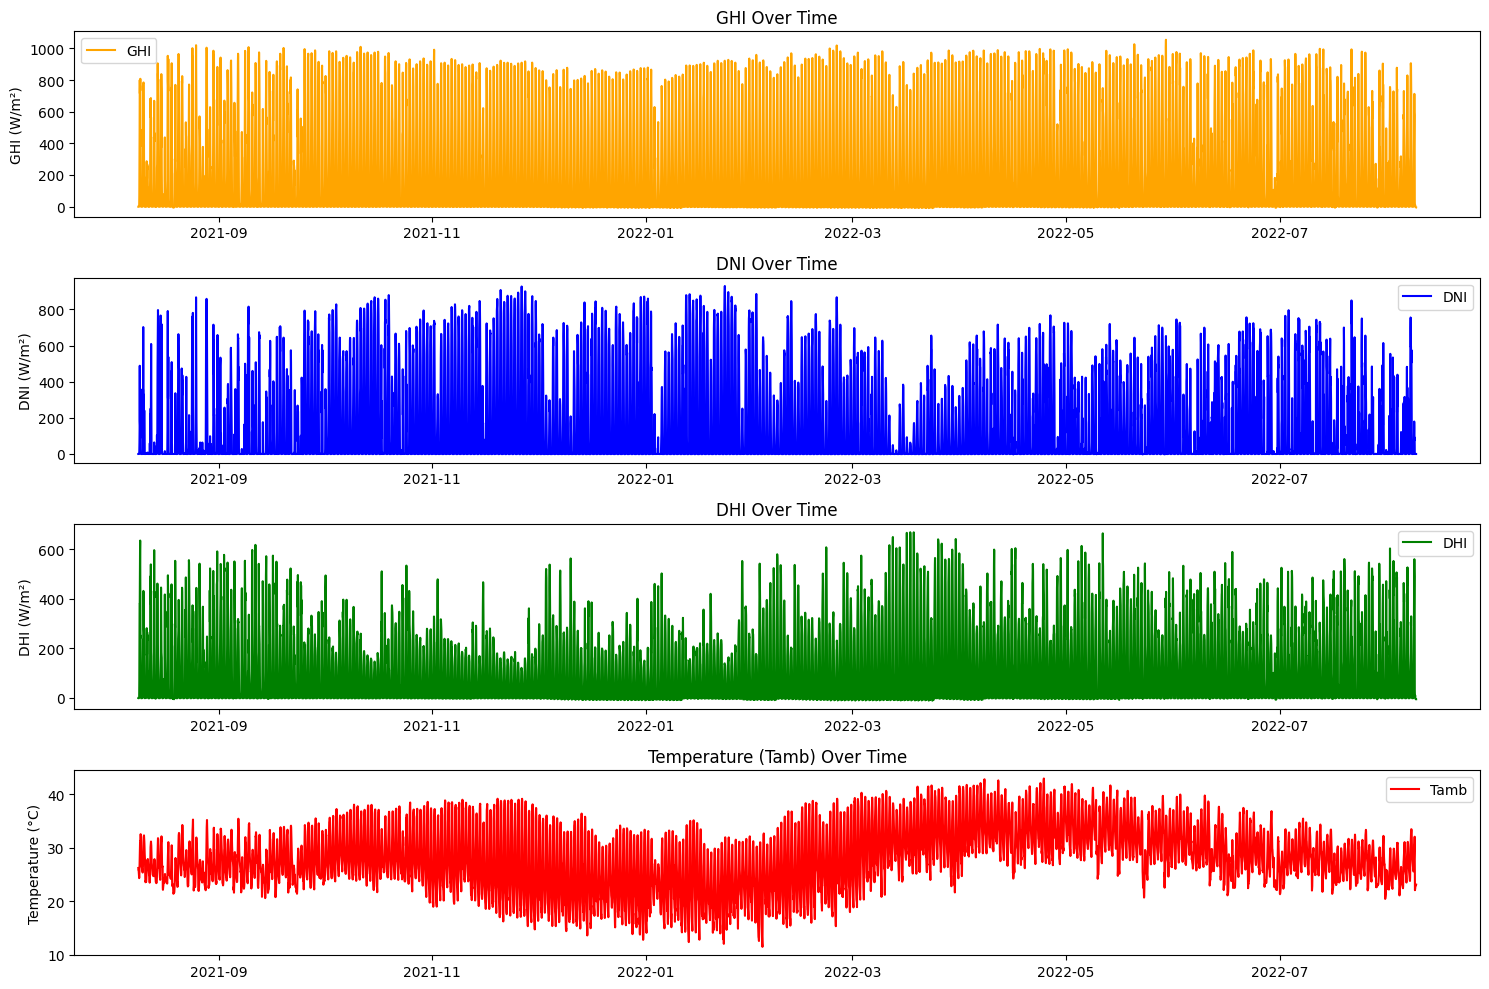

In [ ]:
# Ensuring if Timestamp is in datetime format
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])

# Set Timestamp as the index
benin.set_index('Timestamp', inplace=True)

# Resample the data to hourly averages
hourly_data = benin.resample('H').mean()

#Plotting
plt.figure(figsize=(15, 10))

# GHI Plot
plt.subplot(4, 1, 1)
plt.plot(hourly_data.index, hourly_data['GHI'], label='GHI', color='orange')
plt.title('GHI Over Time')
plt.ylabel('GHI (W/m²)')
plt.legend()

# DNI Plot
plt.subplot(4, 1, 2)
plt.plot(hourly_data.index, hourly_data['DNI'], label='DNI', color='blue')
plt.title('DNI Over Time')
plt.ylabel('DNI (W/m²)')
plt.legend()

# DHI Plot
plt.subplot(4, 1, 3)
plt.plot(hourly_data.index, hourly_data['DHI'], label='DHI', color='green')
plt.title('DHI Over Time')
plt.ylabel('DHI (W/m²)')
plt.legend()

# Tamb Plot
plt.subplot(4, 1, 4)
plt.plot(hourly_data.index, hourly_data['Tamb'], label='Tamb', color='red')
plt.title('Temperature (Tamb) Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()


plt.tight_layout()
plt.show()

Aggregating by month

<ipython-input-13-d3508235fa8e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = benin.resample('M').mean()


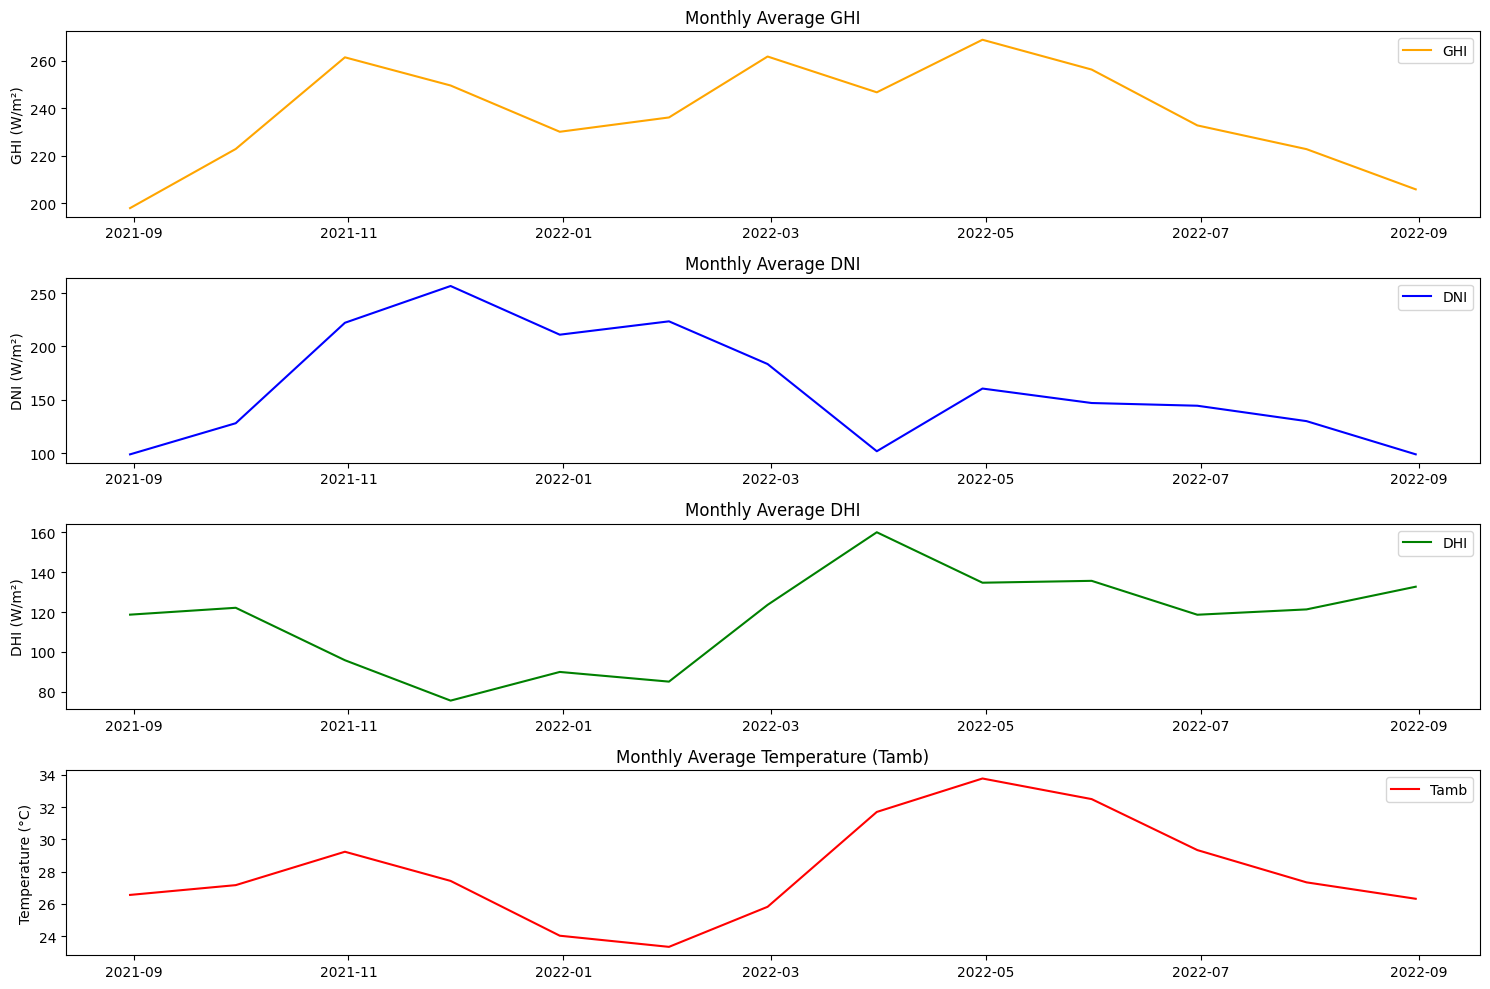

In [ ]:
# Resample the data to monthly averages
monthly_data = benin.resample('M').mean()

# Plotting
plt.figure(figsize=(15, 10))

# GHI Plot
plt.subplot(4, 1, 1)
plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI', color='orange')
plt.title('Monthly Average GHI')
plt.ylabel('GHI (W/m²)')
plt.legend()

# DNI Plot
plt.subplot(4, 1, 2)
plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI', color='blue')
plt.title('Monthly Average DNI')
plt.ylabel('DNI (W/m²)')
plt.legend()

# DHI Plot
plt.subplot(4, 1, 3)
plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI', color='green')
plt.title('Monthly Average DHI')
plt.ylabel('DHI (W/m²)')
plt.legend()

# Tamb Plot
plt.subplot(4, 1, 4)
plt.plot(monthly_data.index, monthly_data['Tamb'], label='Tamb', color='red')
plt.title('Monthly Average Temperature (Tamb)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

#Assessing the impact of cleaning on ModA and ModB.

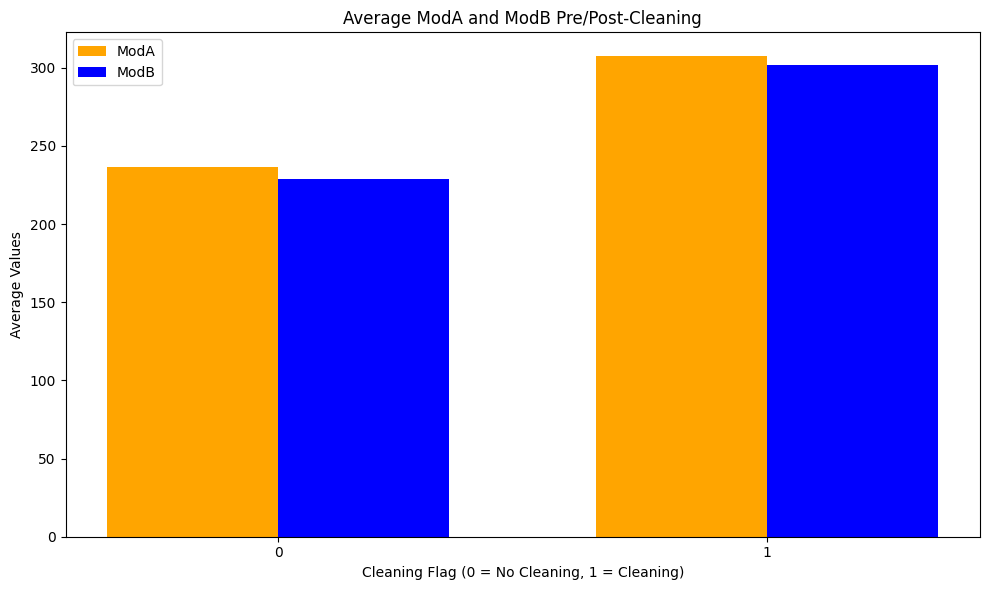

In [ ]:
cleaning_impact = benin.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

plt.figure(figsize=(10, 6))

# Bar plot for ModA and ModB
bar_width = 0.35
index = range(len(cleaning_impact))

# ModA Bars
plt.bar(index, cleaning_impact['ModA'], bar_width, label='ModA', color='orange')
# ModB Bars
plt.bar([i + bar_width for i in index], cleaning_impact['ModB'], bar_width, label='ModB', color='blue')

plt.xlabel('Cleaning Flag (0 = No Cleaning, 1 = Cleaning)')
plt.ylabel('Average Values')
plt.title('Average ModA and ModB Pre/Post-Cleaning')
plt.xticks([i + bar_width / 2 for i in index], cleaning_impact['Cleaning'])
plt.legend()


plt.tight_layout()
plt.show()

#Correlation and relationship analysis

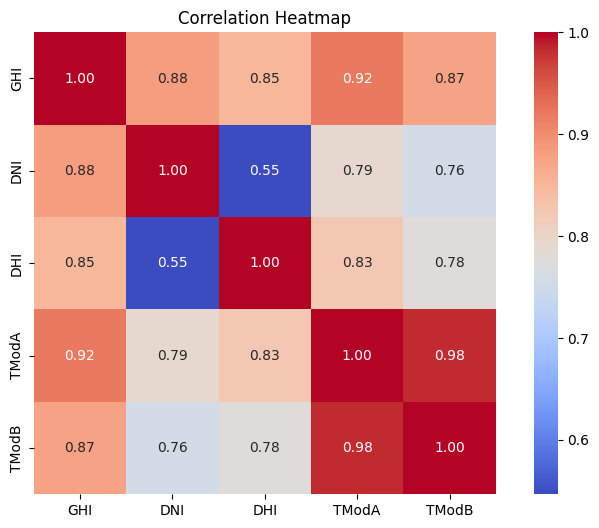

In [16]:
#Heatmap of Correlations
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = benin[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



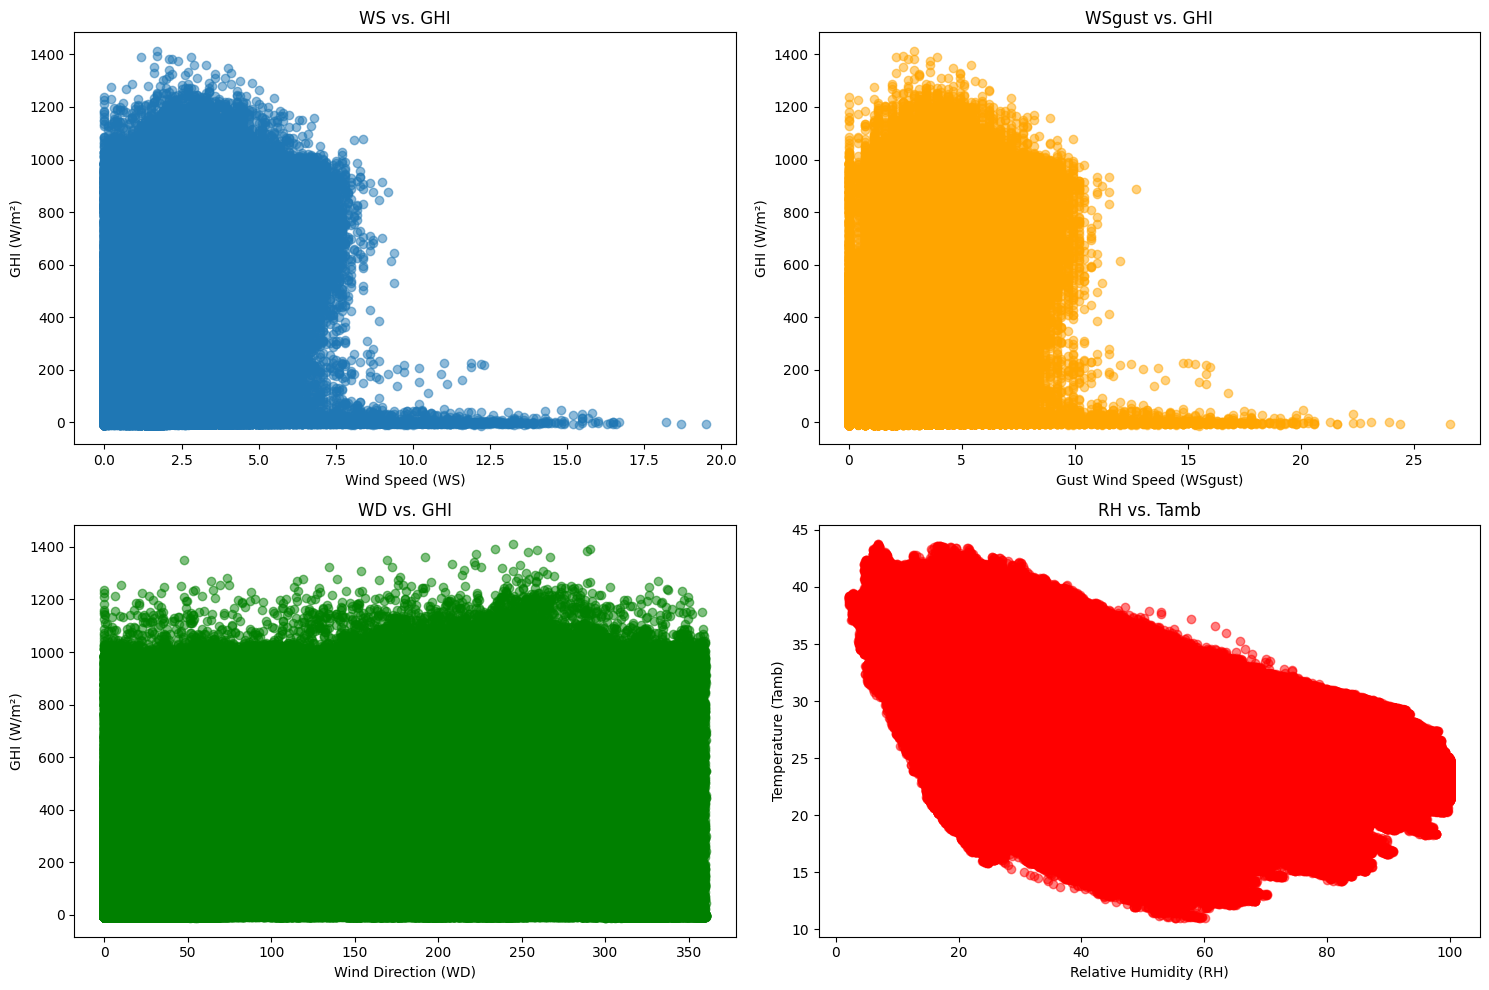

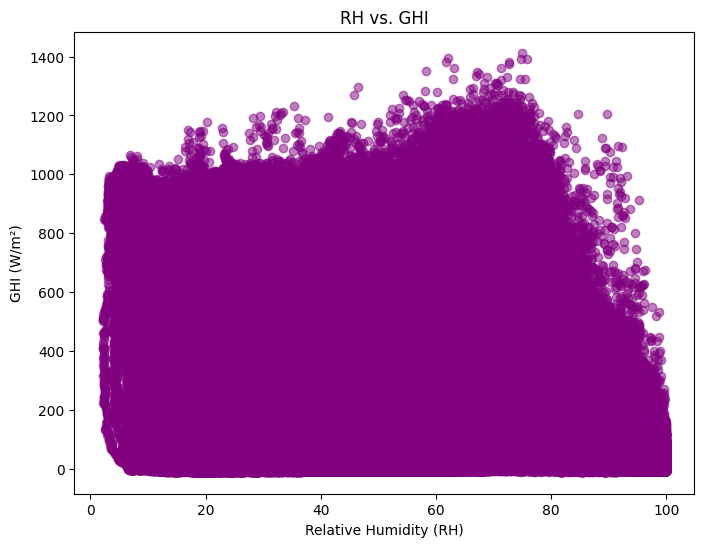

In [17]:
#Scatter Plots

# Scatter Plot: WS vs. GHI
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(benin['WS'], benin['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI (W/m²)')

# Scatter Plot: WSgust vs. GHI
plt.subplot(2, 2, 2)
plt.scatter(benin['WSgust'], benin['GHI'], alpha=0.5, color='orange')
plt.title('WSgust vs. GHI')
plt.xlabel('Gust Wind Speed (WSgust)')
plt.ylabel('GHI (W/m²)')

# Scatter Plot: WD vs. GHI
plt.subplot(2, 2, 3)
plt.scatter(benin['WD'], benin['GHI'], alpha=0.5, color='green')
plt.title('WD vs. GHI')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI (W/m²)')

# Scatter Plot: RH vs. Tamb
plt.subplot(2, 2, 4)
plt.scatter(benin['RH'], benin['Tamb'], alpha=0.5, color='red')
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')

plt.tight_layout()
plt.show()

#Scatter Plot: RH vs. GHI
plt.figure(figsize=(8, 6))
plt.scatter(benin['RH'], benin['GHI'], alpha=0.5, color='purple')
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI (W/m²)')
plt.show()

#Wind and Distribution analysis

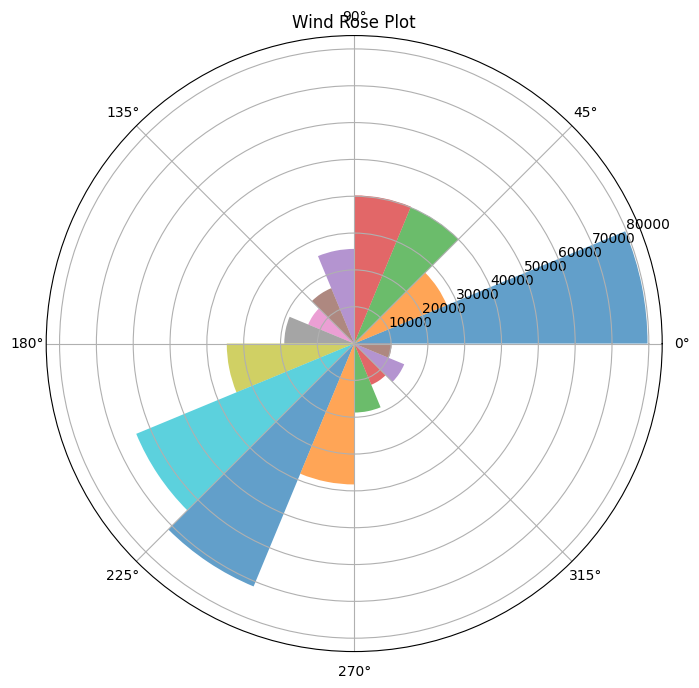

In [ ]:
# Wind Rose Plot
def wind_rose(ws, wd, bins=16):
    #histogram of wind direction
    wind_dir_hist, bin_edges = np.histogram(wd, bins=bins)

    # Calculating the center of each bin for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Converting wind speed to a radial scale
    wind_speed_bins = np.digitize(ws, bins=np.linspace(0, ws.max(), num=6))

    # Setup the plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    #wind rose
    for i in range(len(wind_dir_hist)):
        ax.bar(np.deg2rad(bin_centers[i]), wind_dir_hist[i], width=np.deg2rad(360/bins), alpha=0.7)

    ax.set_title('Wind Rose Plot')
    plt.show()

# Call the wind rose function
wind_rose(benin['WS'], benin['WD'])



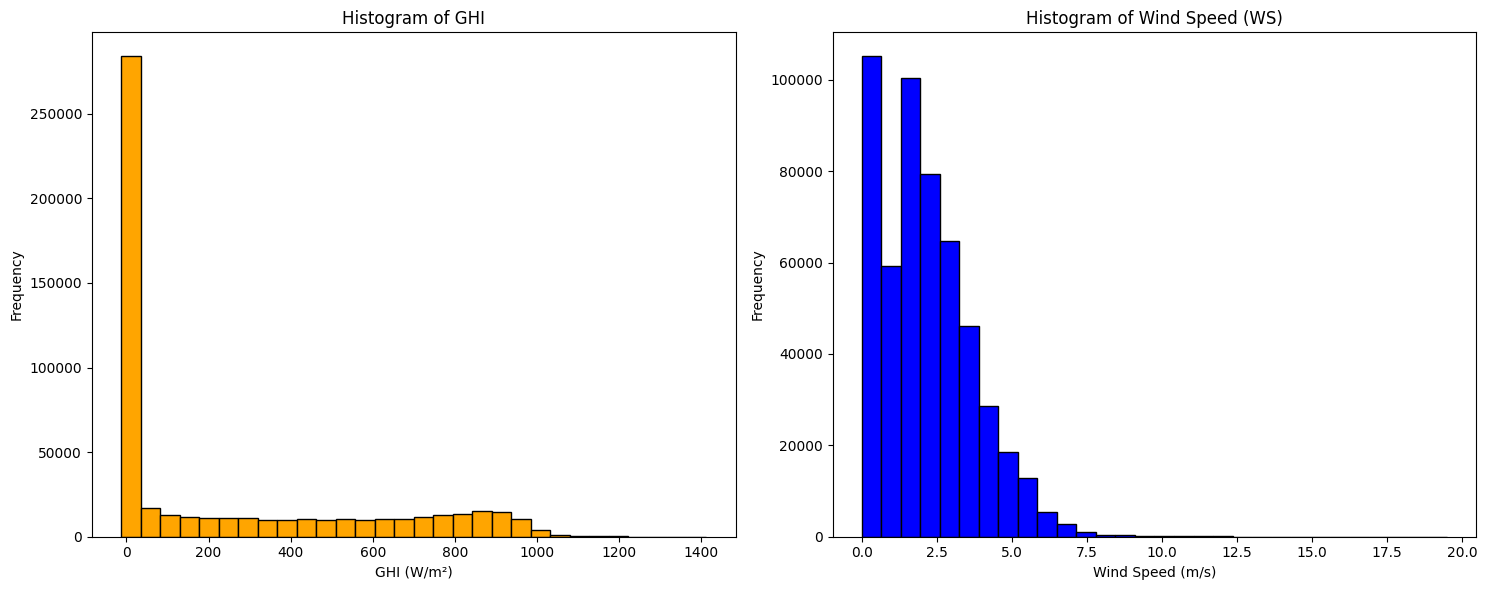

In [19]:
# Histograms
plt.figure(figsize=(15, 6))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(benin['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(benin['WS'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Temperature Analysis

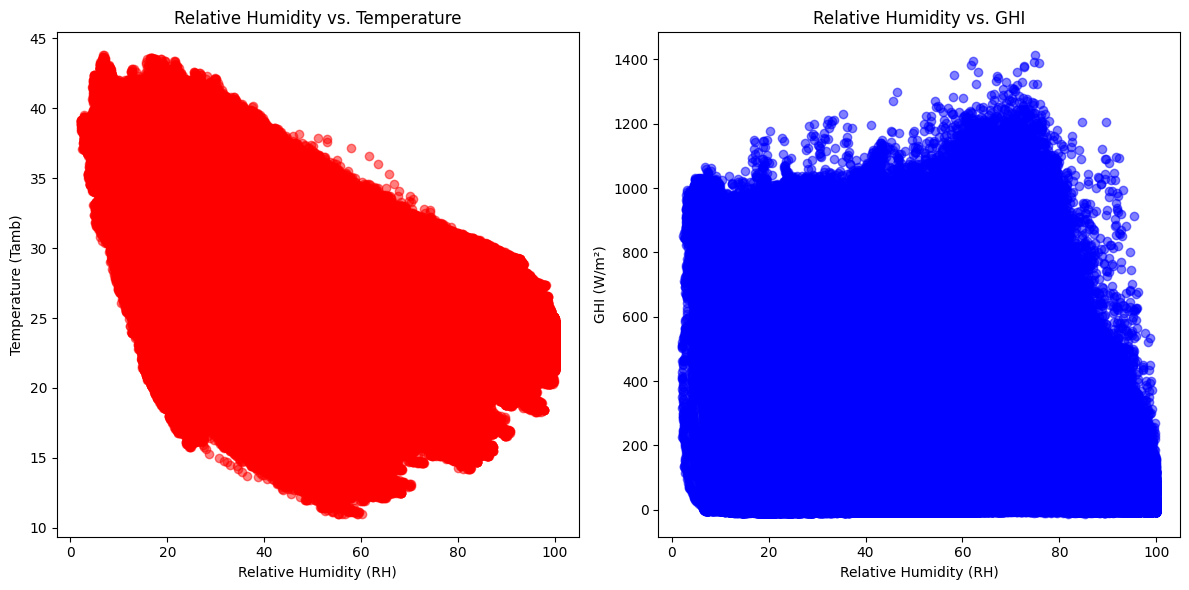

In [20]:
#Scatter Plots

# Scatter Plot: RH vs. Temperature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(benin['RH'], benin['Tamb'], alpha=0.5, color='red')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')

# Scatter Plot: RH vs. GHI
plt.subplot(1, 2, 2)
plt.scatter(benin['RH'], benin['GHI'], alpha=0.5, color='blue')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()


In [ ]:
#Statistical Analysis
correlation_temp = benin['RH'].corr(benin['Tamb'])
correlation_ghi = benin['RH'].corr(benin['GHI'])

print(f"Correlation between RH and Temperature: {correlation_temp:.2f}")
print(f"Correlation between RH and GHI: {correlation_ghi:.2f}")


Correlation between RH and Temperature: -0.41
Correlation between RH and GHI: -0.36


#Bubble Chart

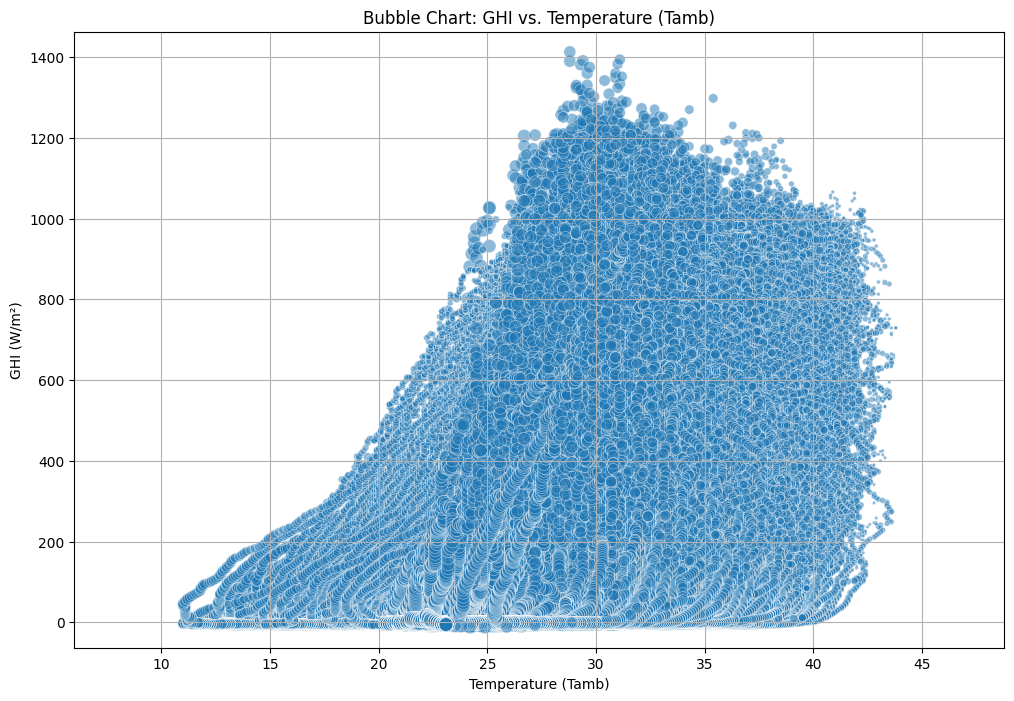

In [22]:
plt.figure(figsize=(12, 8))

bubble_size = benin['RH']

plt.scatter(benin['Tamb'], benin['GHI'], s=bubble_size, alpha=0.5, edgecolors='w', linewidth=0.5)

plt.title('Bubble Chart: GHI vs. Temperature (Tamb)')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI (W/m²)')
plt.xlim(benin['Tamb'].min() - 5, benin['Tamb'].max() + 5)
plt.ylim(benin['GHI'].min() - 50, benin['GHI'].max() + 50)

plt.grid()
plt.show()